In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica']
rcParams['font.size'] = 7
# rcParams['pdf.fonttype'] = 42
# rcParams['ps.fonttype'] = 42
# rcParams['svg.fonttype'] = 'none'


path_figures=Path().cwd().parent.parent/"figures"
path_figures.mkdir(parents=True, exist_ok=True)
path_benchmark_data=Path.cwd().parent.parent/"benchmark_for_test"
path_benchmark_data.mkdir(parents=True, exist_ok=True)

In [2]:
step="update"
library_size=1_000_000
added_size=[100, 1_000, 10_000, 100_000, 1_000_000]

ion_mode=[-1,1]


In [3]:

df=[]
for charge in ion_mode:
    for add_size in added_size:
        data={"library_number":library_size,"add_size":add_size, "step":step, "charge":charge}
        
        path_benchmark_specific_data_dynamic=path_benchmark_data/f"dynamic_fast_update_{charge}_{add_size}_added_to_{library_size}_compare_time_{step}_step_options_added_size.txt"
        
        path_benchmark_specific_data_flash=path_benchmark_data/f"flash_{charge}_{add_size}_added_to_{library_size}_compare_time_{step}_step_options_added_size.txt"
        
        path_benchmark_specific_data_masstp=path_benchmark_data/f"masstplus_{charge}_{add_size}_added_to_{library_size}_compare_time_{step}_step_options_added_size.txt"
        
        try:
            with open(path_benchmark_specific_data_dynamic,"r") as f1,\
                open(path_benchmark_specific_data_flash, "r") as f2,\
                open(path_benchmark_specific_data_masstp, "r") as f3:
                dynamic=float(f1.readline().strip())
                flash=float(f2.readline().strip())
                masstp=float(f3.readline().strip())
            data["dynamic_entropy_search(fast_update)"]=dynamic
            data["flash_entropy_search"]=flash
            data["masstplus"]=masstp
        except:
            print(path_benchmark_specific_data_dynamic)
            print(path_benchmark_specific_data_flash)
            print(path_benchmark_specific_data_masstp)
        
        df.append(pd.DataFrame([data]))
        
df=pd.concat(df)

df

,library_number,add_size,step,charge,dynamic_entropy_search(fast_update),flash_entropy_search,masstplus
0,1000000,100,update,-1,0.058649,35.016428,12.137147
0,1000000,1000,update,-1,0.118571,35.088184,28.450660
0,1000000,10000,update,-1,0.405091,35.007343,33.437059
0,1000000,100000,update,-1,3.190353,38.357640,45.307807
0,1000000,1000000,update,-1,30.578197,71.238431,408.979780
0,1000000,100,update,1,0.041833,52.992557,30.929461
0,1000000,1000,update,1,0.136162,52.985174,49.845152
0,1000000,10000,update,1,0.583060,53.140957,57.141734
0,1000000,100000,update,1,4.863718,58.579668,78.314790
0,1000000,1000000,update,1,48.868863,111.310118,794.715167


In [4]:

df_data = df[["add_size", 
              "charge",
            "dynamic_entropy_search(fast_update)", 
            "flash_entropy_search",
            "masstplus"]]
df_melted=df_data.melt(id_vars=["charge", "add_size"], var_name="type", value_name="time")
df_melted


,charge,add_size,type,time
0,-1,100,dynamic_entropy_search(fast_update),0.058649
1,-1,1000,dynamic_entropy_search(fast_update),0.118571
2,-1,10000,dynamic_entropy_search(fast_update),0.405091
3,-1,100000,dynamic_entropy_search(fast_update),3.190353
4,-1,1000000,dynamic_entropy_search(fast_update),30.578197
5,1,100,dynamic_entropy_search(fast_update),0.041833
6,1,1000,dynamic_entropy_search(fast_update),0.136162
7,1,10000,dynamic_entropy_search(fast_update),0.583060
8,1,100000,dynamic_entropy_search(fast_update),4.863718
9,1,1000000,dynamic_entropy_search(fast_update),48.868863


/tmp/ipykernel_1256735/459646924.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_add_size'] = np.log10(df_charge['add_size'])


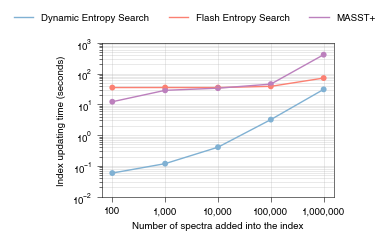

In [ ]:
charge=-1
df_charge=df_melted[df_melted["charge"]==charge]

# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
    
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which='both', width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)

df_charge['log_add_size'] = np.log10(df_charge['add_size'])
add_sizes = sorted(df_charge['add_size'].unique())
log_add_sizes = np.log10(add_sizes)
sns.scatterplot(x="log_add_size", y="time", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')
sns.lineplot(x="log_add_size", y="time", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, zorder=5)

plt.xticks(log_add_sizes, [f"{size:,.0f}" for size in add_sizes])
plt.yscale("log")

plt.ylim(1e-2, 1e3)

# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)



# Set y-axis title
plt.ylabel(f"Index updating time (seconds)")


if charge==-1:
    mode="-"
elif charge==1:
    mode='+'
plt.xlabel(f"Number of spectra added into the index")

# # Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update)", "flash_entropy_search", "masstplus"]]

# # Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=3, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"compare_time_different_add_size_{step}_step_{charge}_options_added_size.svg", bbox_inches="tight", dpi=1200)

/tmp/ipykernel_1256735/2476984594.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_charge['log_add_size'] = np.log10(df_charge['add_size'])


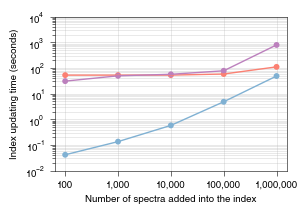

In [6]:
charge=1
df_charge=df_melted[df_melted["charge"]==charge]


# Plotting
color_palette_set2 = sns.color_palette("Set3", 12)
color_palette={
    "dynamic_entropy_search(fast_update)": color_palette_set2[4],
    "flash_entropy_search": color_palette_set2[3],
    "masstplus": color_palette_set2[-3],
    
}
fig, ax = plt.subplots(figsize=(3, 2))

ax.tick_params(which='both', width=0.4)          
for spine in ax.spines.values():  
    spine.set_linewidth(0.4)


df_charge['log_add_size'] = np.log10(df_charge['add_size'])
add_sizes = sorted(df_charge['add_size'].unique())
log_add_sizes = np.log10(add_sizes)
sns.scatterplot(x="log_add_size", y="time", hue="type", data=df_charge, 
            palette=color_palette, size=1, alpha=1, legend=False, zorder=5, edgecolors='none')
sns.lineplot(x="log_add_size", y="time", hue="type", data=df_charge, 
            palette=color_palette, estimator=np.median, errorbar=None, linewidth=1, legend=False, zorder=5)

plt.xticks(log_add_sizes, [f"{size:,.0f}" for size in add_sizes])
plt.yscale("log")

plt.ylim(1e-2, 1e4)

# Add grid
plt.grid(True, which="both", ls="-", alpha=0.5, zorder=1, linewidth=0.4)


if charge==-1:
    mode="-"
elif charge==1:
    mode='+'
# Set y-axis title
plt.ylabel(f"Index updating time (seconds)")



plt.xlabel(f"Number of spectra added into the index")

# Change legend
# handles, labels = ax.get_legend_handles_labels()
# legend_dict = {l: h for h, l in zip(handles, labels)}
# labels_new = ["Dynamic Entropy Search", "Flash Entropy Search", "MASST+"]
# handles_new = [legend_dict[l] for l in ["dynamic_entropy_search(fast_update)", "flash_entropy_search", "masstplus"]]
# ax.legend(handles_new, labels_new, frameon=False, loc="upper left", markerscale=4, bbox_to_anchor=(1, 0.65))
# Move legend to the top
# ax.legend(handles_new, labels_new, frameon=False, loc="upper center",ncol=2, bbox_to_anchor=(0.4, 1.25))

# Save figure
plt.savefig(path_figures / f"compare_time_different_add_size_{step}_step_{charge}_options_added_size.svg", bbox_inches="tight", dpi=1200)